In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [2]:
test = pd.read_csv('data/test.csv')
train = pd.read_csv('data/train.csv')
samplesubmission = pd.read_csv('data/sample_submission.csv')

In [3]:
test.head()

,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,cabin,embarked,MedBoat
0,1148,3.0,"Rintamaki, Mr. Matti",male,35.0,0.0,0.0,STON/O 2. 3101273,7.1250,NaN,S,NaN
1,1049,3.0,"Nakid, Mr. Sahid",male,20.0,1.0,1.0,2653,15.7417,NaN,C,C
2,982,3.0,"Lyntakoff, Mr. Stanko",male,NaN,0.0,0.0,349235,7.8958,NaN,S,NaN
3,808,3.0,"Ford, Mr. Arthur",male,NaN,0.0,0.0,A/5 1478,8.0500,NaN,S,NaN
4,1195,3.0,"Shaughnessy, Mr. Patrick",male,NaN,0.0,0.0,370374,7.7500,NaN,Q,NaN


In [4]:
train.head()

,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,cabin,embarked,MedBoat,Survived
0,1214,3,"Smiljanic, Mr. Mile",male,NaN,0,0,315037,8.6625,NaN,S,NaN,0
1,677,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,NaN,S,NaN,0
2,534,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S,11,1
3,1174,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,0
4,864,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S,NaN,0


In [5]:
samplesubmission.head()

,traveller_ID,Survived
0,1148,0
1,1049,1
2,982,0
3,808,1
4,1195,0


In [6]:
target = [col for col in train.columns if col not in test.columns]
target

['Survived']

In [7]:
categorical_feat = [ feat for feat in train.columns if train[feat].dtype == "O"]
categorical_feat

['name', 'sex', 'TickNum', 'cabin', 'embarked', 'MedBoat']

In [8]:
num_feat = [feat for feat in train.columns if feat not in categorical_feat]
num_feat

['traveller_ID',
 'ticket_class',
 'age',
 'Siblings_spouses',
 'Parchil',
 'fare',
 'Survived']

In [9]:
rem = ['traveller_ID', 'Survived']
for i in rem:
    num_feat.remove(i)
num_feat

['ticket_class', 'age', 'Siblings_spouses', 'Parchil', 'fare']

In [10]:
mean_age = np.round(train.age.mean())

In [17]:
mean_age

29.0

In [32]:
train.age.fillna(mean_age, inplace = True)
test.age.fillna(mean_age, inplace = True)

In [15]:
fare_mode = train.fare.mode()
fare_mode

0     8.05
1    26.00
dtype: float64

In [16]:
fare_mode = (train.fare.mode()[0] + train.fare.mode()[1])/2
fare_mode

17.025

In [31]:
train.fare.fillna(fare_mode, inplace = True)
test.fare.fillna(fare_mode, inplace = True)

In [20]:
train[num_feat].head()

,ticket_class,age,Siblings_spouses,Parchil,fare
0,3,29.0,0,0,8.6625
1,3,26.0,0,0,7.8958
2,2,19.0,0,0,26.0000
3,3,29.0,8,2,69.5500
4,3,28.0,0,0,7.7750


In [73]:
scaler = StandardScaler()
cols = num_feat
X = scaler.fit_transform(train[num_feat])
testing = scaler.transform(test[num_feat])
X = pd.DataFrame(data = X, columns = cols)
testing = pd.DataFrame(data = test, columns = cols)
X.head()

,ticket_class,age,Siblings_spouses,Parchil,fare
0,0.825248,-0.006586,-0.498616,-0.432553,-0.474152
1,0.825248,-0.249258,-0.498616,-0.432553,-0.488677
2,-0.363317,-0.815493,-0.498616,-0.432553,-0.145702
3,0.825248,-0.006586,6.897852,1.805972,0.679330
4,0.825248,-0.087477,-0.498616,-0.432553,-0.490965


In [74]:
X_train, X_test, y_train, y_test = train_test_split(  X, train.Survived, test_size=0.20, random_state=0)

In [75]:
def models(X_train, Y_train):
    logReg = LogisticRegression(random_state = 0)
    logReg.fit(X_train, y_train)
    
    # Kneigbours
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, y_train)
    
    #SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, y_train)
    
    #svc rbf
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(X_train, y_train)
    
    #guissian 
    naiv = GaussianNB()
    naiv.fit(X_train, y_train)
    
    #Decision tree
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, y_train)
    
    #Random forest
    randFC = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    randFC.fit(X_train, y_train)
    
    print('[0] Logistic Regression Training Accuracy: ', logReg.score(X_train, y_train))
    print('[1] knn Training Accuracy: ', knn.score(X_train, y_train))
    print('[2] svc lin Training Accuracy: ', svc_lin.score(X_train, y_train))
    print('[3] svc rbf Accuracy: ', svc_rbf.score(X_train, y_train))
    print('[4] naiv Training Accuracy: ', naiv.score(X_train, y_train))
    print('[5] tree Training Accuracy: ', tree.score(X_train, y_train))
    print('[6] randFC Training Accuracy: ', randFC.score(X_train, y_train))
    return logReg, knn, svc_lin, svc_rbf, naiv, tree, randFC

In [76]:
model = models(X_train, y_train)

[0] Logistic Regression Training Accuracy:  0.7008196721311475
[1] knn Training Accuracy:  0.7814207650273224
[2] svc lin Training Accuracy:  0.6926229508196722
[3] svc rbf Accuracy:  0.755464480874317
[4] naiv Training Accuracy:  0.6871584699453552
[5] tree Training Accuracy:  0.9508196721311475
[6] randFC Training Accuracy:  0.9371584699453552


C:\Users\HACADEMY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HACADEMY\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [77]:
for i in range(len(model)):
    cf = confusion_matrix(y_test, model[i].predict(X_test))
    TN, FP, FN, TP = cf.ravel()
    test_score = (TP + TN ) / (TP + TN + FN + FP)
    print(cf)
    print('Model[{}] accuracy = "{}"'.format(i, test_score))
    print()

[[95 16]
 [43 30]]
Model[0] accuracy = "0.6793478260869565"

[[85 26]
 [35 38]]
Model[1] accuracy = "0.6684782608695652"

[[81 30]
 [37 36]]
Model[2] accuracy = "0.6358695652173914"

[[93 18]
 [36 37]]
Model[3] accuracy = "0.7065217391304348"

[[92 19]
 [44 29]]
Model[4] accuracy = "0.657608695652174"

[[85 26]
 [33 40]]
Model[5] accuracy = "0.6793478260869565"

[[82 29]
 [37 36]]
Model[6] accuracy = "0.6413043478260869"



In [60]:
pred = model[3].predict(X_test)
pred2 = model[3].predict(X_train)

In [61]:
print("Training Set")
print("Classifier f1 score {}".format(f1_score(y_train, pred2)))
print("")
print('testing set')
print('classification f1_score {}'.format(f1_score(y_test, pred)))

Training Set
Classifier f1 score 0.6

testing set
classification f1_score 0.4423076923076923


In [62]:
submission_file = samplesubmission.copy()

In [63]:
submission_file.Survived = classifier.predict(testing)

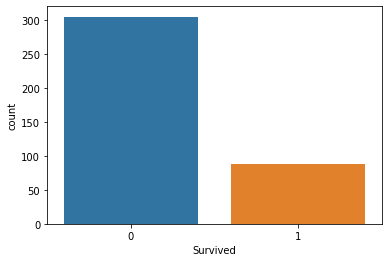

In [64]:
sns.countplot(submission_file.Survived)

In [83]:
submission_file.to_csv('third.csv', index = False)